In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import print_function
from orphics import maps,io,cosmology,stats,btip
from enlib import enmap
import numpy as np

In [2]:
deg = 3.
px = 0.5
shape,wcs,modlmap,cc,mgen = maps.flat_sim(deg,px,lmax=6000,lensed=True,pol=True)
modrmap = enmap.modrmap(shape,wcs)

Generating theory Cls...
Loaded cached Cls from  output/clsAll_low_acc_False_6000_20180310.pkl
Loaded cached Cls from  output/clphi_low_acc_False_6000_20180310.txt


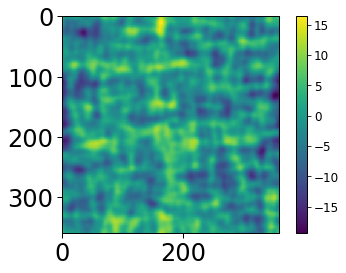

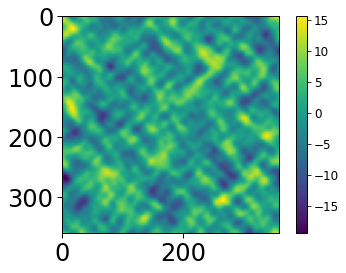

In [3]:
imap = mgen.get_map()
io.plot_img(imap[1])
io.plot_img(imap[2])

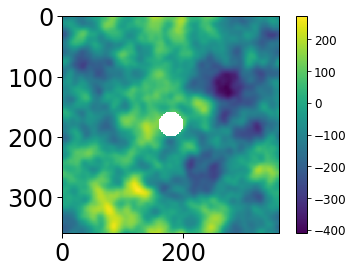

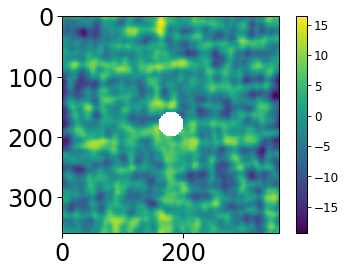

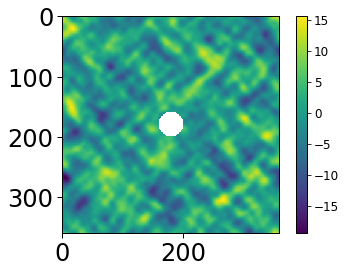

In [4]:
masked = imap.copy()
hole_arcmin = 10.
context_arcmin = 35.
mask_radius = hole_arcmin*np.pi/180./60.
masked[:,modrmap<mask_radius] = np.nan
io.plot_img(masked[0])
io.plot_img(masked[1])
io.plot_img(masked[2])

In [5]:
power2d = cc.theory.lCl('TT',modlmap)
btip.make_circular_geometry(shape,wcs,context_arcmin,hole_arcmin,power2d,buffer_factor = 2,verbose=True)

Downsampling...
Starting slow part...


MemoryError: 